see GetPreferRoute.py for more info

In [9]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
CoreAir = {}
with open('US_Core_Airport.csv') as csvfile:
    line = csv.reader(csvfile)
    for row in line:
        CoreAir['K'+row[0]] = [float(row[1]),float(row[2])]

In [3]:
NavAid = {}
with open('Coords_VOR.csv','r') as csvfile:
    line = csv.reader(csvfile)
    next(line)
    for row in line:
        NavAid[row[0]] = [float(row[2]),float(row[3])]
with open('Coords_Waypnt.csv','r') as csvfile2:
    line2 = csv.reader(csvfile2)
    for row in line2:
        NavAid[row[0]] = [float(row[1]),float(row[2])]

In [4]:
Pref_Route = {}
keylist = []
with open('PreferredRoute34Core.csv','r') as csvfile:
    line = csv.reader(csvfile)
    for row in line:
#         if row[0] == 'FLL' and row[2] == 'JFK':
        key = row[0] + '_' + row[2]
        CoordList = []
        CoordList.append(CoreAir['K'+row[0]])
        Route = row[1].split(' ')
        for item in Route:
            if NavAid.has_key(item):
                CoordList.append(NavAid[item])
            else:
                pass
        CoordList.append(CoreAir['K'+row[2]])
        if key not in keylist:
            i = 0
            Pref_Route[key] = {}
            keylist.append(key)
        else:
            i += 1
            pass
        Pref_Route[key][str(i)] = np.asarray(CoordList)

0
1


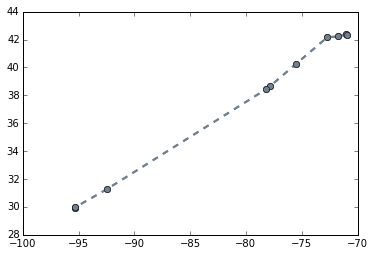

In [5]:
KEY = 'BOS_IAH'
for i in range(len(Pref_Route[KEY])):
    print i
    plt.plot(Pref_Route[KEY][str(i)][:,1],Pref_Route[KEY][str(i)][:,0],'o--', c='#708090',zorder = 20,lw = 2)
# plt.xlim(-86,-70)
# plt.ylim(24,44)

In [6]:
CD_Route = {}
keylist = []
with open('CodedDepatureRoute34Core.csv','r') as csvfile:
    line = csv.reader(csvfile)
    for row in line:
        key = row[1] + '_' + row[2]
        CoordList = []
        CoordList.append(CoreAir[row[1]])
        Route = row[4].split(' ')
        for item in Route:
            if NavAid.has_key(item):
                CoordList.append(NavAid[item])
            else:
                pass
        CoordList.append(CoreAir[row[2]])
        if key not in keylist:
            i = 0
            CD_Route[key] = {}
            keylist.append(key)
        else:
            i += 1
            pass
        CD_Route[key][str(i)] = np.asarray(CoordList)

In [26]:
def PlotCDR(key,KEY):
    fig = plt.figure(figsize = (16,12))
    m = Basemap(llcrnrlon = -126,llcrnrlat = 23.5,urcrnrlon = -65,urcrnrlat = 50,projection='merc')
    m.bluemarble()
    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)
    m.drawstates(linewidth=0.5)
    m.drawparallels(np.arange(10.,35.,5.))
    m.drawmeridians(np.arange(-120.,-80.,10.))

    ax = fig.add_subplot(111)
    for i in range(len(CD_Route[key])):
        x_CDR, y_CDR = m(CD_Route[key][str(i)][:,1],CD_Route[key][str(i)][:,0])
        ax.plot(x_CDR,y_CDR,'o--')
    for i in range(len(Pref_Route[KEY])):
        x_PR, y_PR = m(Pref_Route[KEY][str(i)][:,1],Pref_Route[KEY][str(i)][:,0])
        ax.plot(x_PR,y_PR,'*-', c='w',zorder = 1,lw = 2)

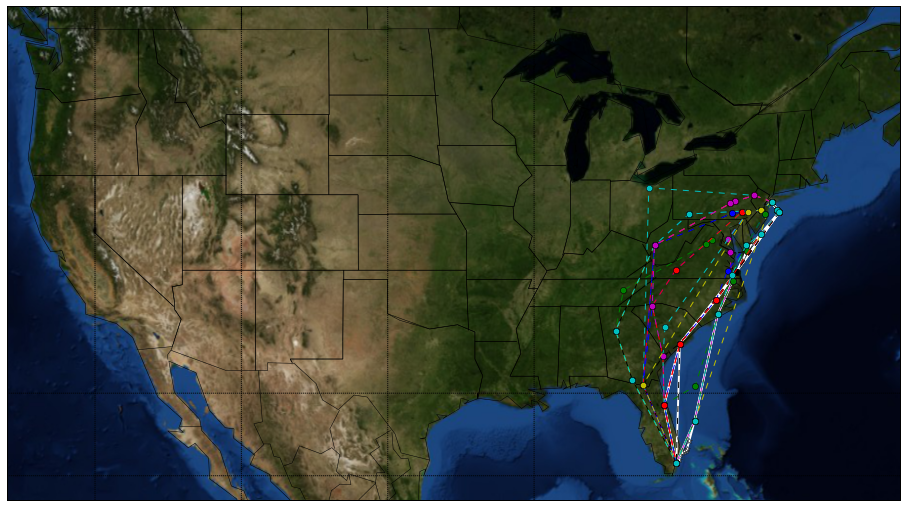

In [29]:
key = 'KJFK_KMIA'
KEY = 'JFK_MIA'
PlotCDR(key,KEY)

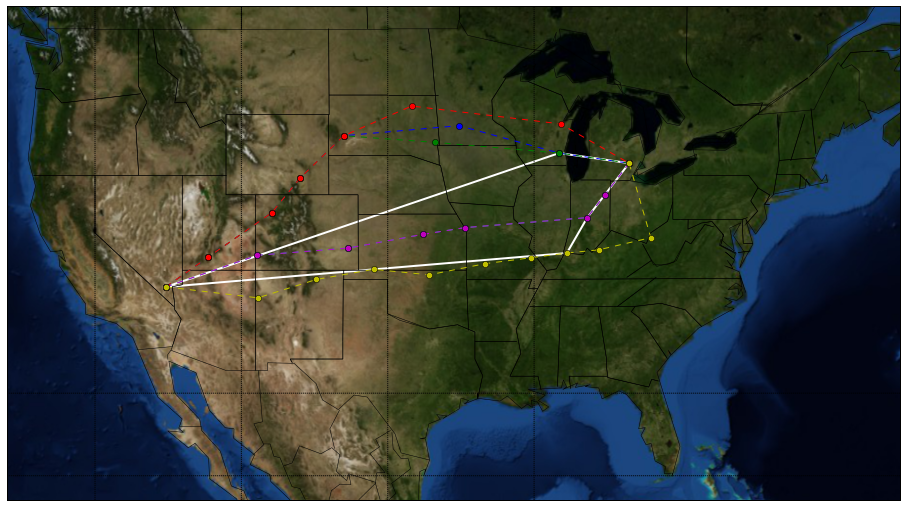

In [30]:
key = 'KLAS_KDTW'
KEY = 'LAS_DTW'
PlotCDR(key,KEY)

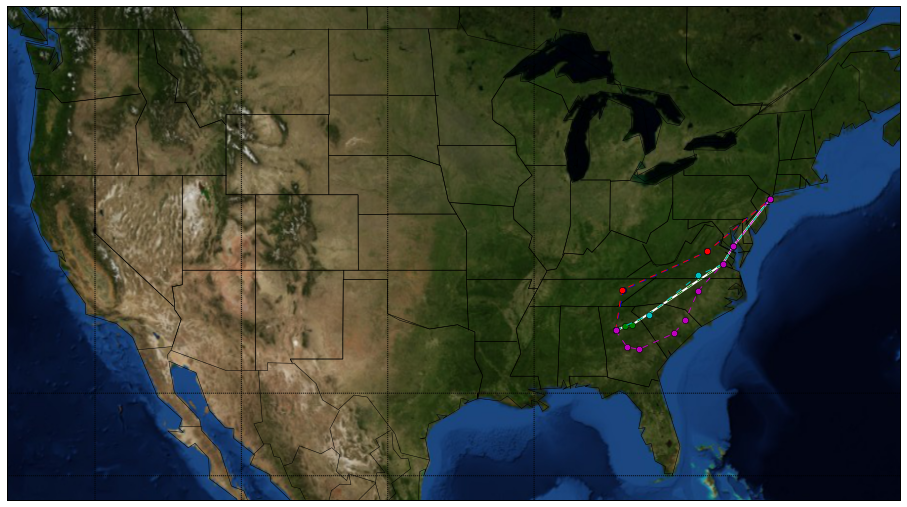

In [31]:
key = 'KATL_KLGA'
KEY = 'ATL_LGA'
PlotCDR(key,KEY)

In [32]:
import numpy as np

In [40]:
a = np.array([])
b = np.array([1,2,3])

In [43]:
np.append(a,b)

array([ 1.,  2.,  3.])